<a href="https://www.kaggle.com/code/mertdedeolu/titanic?scriptVersionId=92364199" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

<font color = "blue">
Content:
    
1. [Load and Check Data](#1)
2. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)
3. [Basic Data Analysis](#6) 
4. [Outlier Detection](#7)
5. [Missing Value](#8)  
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
6. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
7. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
8. [Modeling](#29)      
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)
    
    

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid") # use seaborn style.
import seaborn as sns
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id="1"></a>
# Load and Check Data

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_passengerid = df_test["PassengerId"]

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="2"></a>
# Variable Description

1. **PassengerId** - Unique id number to each passenger
1. **Survived** - Passenger survive(1) or died(0)
1. **Pclass** - Passenger class 
1. **Name** - Passenger name
1. **Sex** - Gender of passenger
1. **Age** - Age of passenger
1. **SibSp** - Number of siblings/spouses
1. **Parch** - Number of parents/children
1. **Ticket** - Ticket number
1. **Fare** - Amount of money spent on ticket
1. **Cabin** - Cabin category
1. **Embarked** - Port where passenger embarked ( C = Cherbourg, Q = Queenstown, S = Southampton )

* **float64(2)** : Fare, Age
* **int64(5)** : Pclass, SibSp, Parch, PassengerId, Survived
* **object(5)** : Cabin, Embarked, Ticket, Name, Sex

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id="3"></a>
# Univariate Variable Analysis
* **Categorical Variable:** Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp, Parch
* **Numerical Variable:** Age, PassengerId, Fare

<a id="4"></a>
## Categorical Variable

In [6]:
def bar_plot(variable):
    """
        input : variable ex: "Sex"
        output : bar plot & value coun
    """
    # get feature
    var = df_train[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts() 
    
    # visualize
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} : \n {}".format(variable,varValue))

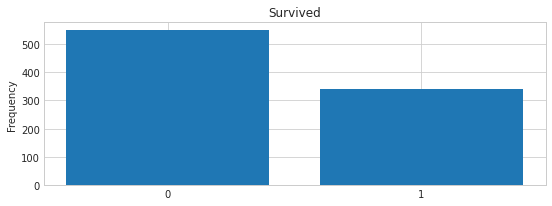

Survived : 
 0    549
1    342
Name: Survived, dtype: int64


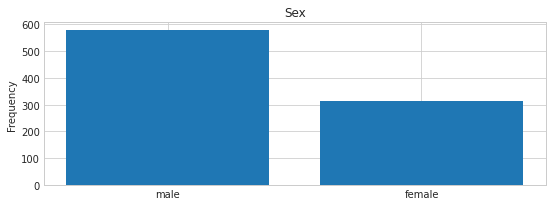

Sex : 
 male      577
female    314
Name: Sex, dtype: int64


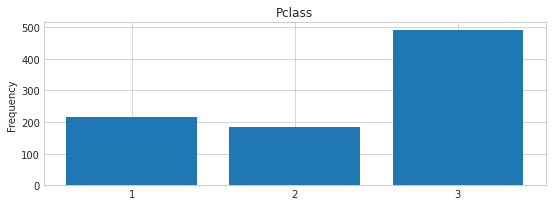

Pclass : 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


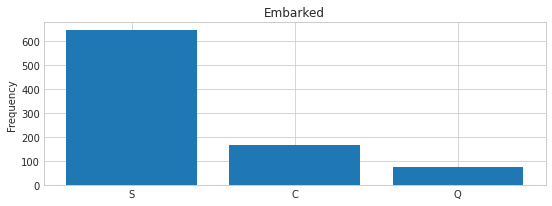

Embarked : 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


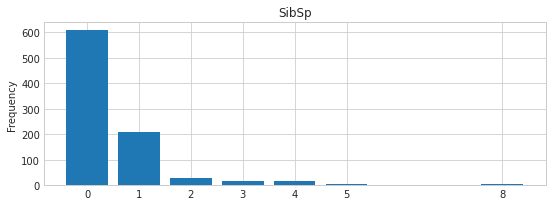

SibSp : 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


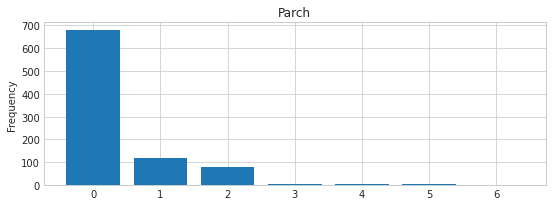

Parch : 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [7]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [8]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(df_train[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



<a id="5"></a>
## Numerical Variable

In [9]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df_train[variable], bins = 100)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

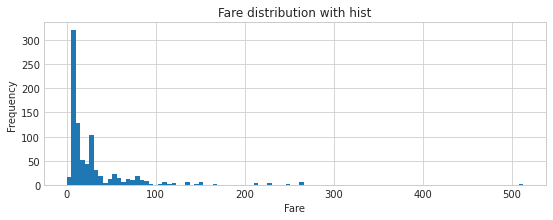

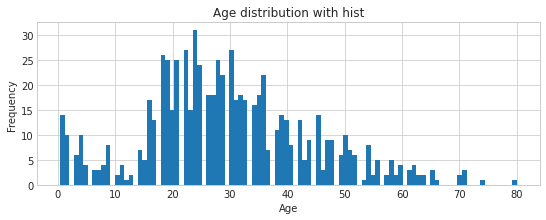

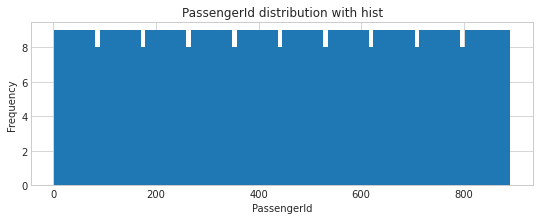

In [10]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id="6"></a>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [11]:
# Pclass vs Survived

df_train[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
# Sex vs Survived

df_train[["Sex","Survived"]].groupby(["Sex"],as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
# SibSp vs Survived

df_train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by = "Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
# Parch vs Survived

df_train[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by = "Survived",ascending= False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id="7"></a>
# Outlier Detection

In [15]:
def deteck_outlier(df,features):
    outlier_indices = []
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile:
        Q3 = np.percentile(df[c],75)
        #IQR 
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = IQR * 1.5
        #Detect outlier and their indeces
        outlier_list_col = df[(df[c]<Q1-outlier_step) | (df[c]>Q3 + outlier_step)].index
        #Store indeces
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v>2)
    
    return multiple_outliers

In [16]:
df_train.loc[deteck_outlier(df_train,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
# Drop outliers
df_train = df_train.drop(deteck_outlier(df_train,["Age","SibSp","Parch","Fare"]),axis= 0).reset_index(drop = True)

<a id="8"></a>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [18]:
df_train_len=len(df_train)
df_train = pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

<a id="9"></a>
# Find Missing Value

In [19]:
df_train.columns[df_train.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [20]:
df_train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id="10"></a>
# Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1 missing value

In [21]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


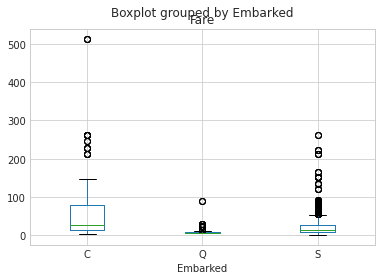

In [22]:
df_train.boxplot(column = "Fare",by = "Embarked")
plt.show()

In [23]:
df_train["Embarked"] = df_train["Embarked"].fillna("C")

In [24]:
df_train["Fare"] =df_train["Fare"].fillna(np.mean(df_train[df_train["Pclass"] == 3]["Fare"]))

In [25]:
df_train[df_train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id= "11"></a><br>
# Visualization


<a id="12"></a><br>
# Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived 

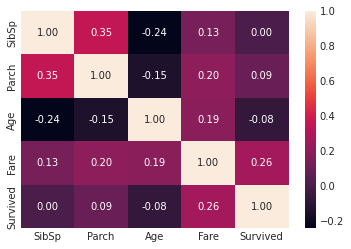

In [26]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(df_train[list1].corr(),annot = True, fmt = ".2f")
plt.show()

# Fare feature seems to have correlation with survived fature (0.26)

<a id="13"></a><br>
# SibSp -- Survived

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


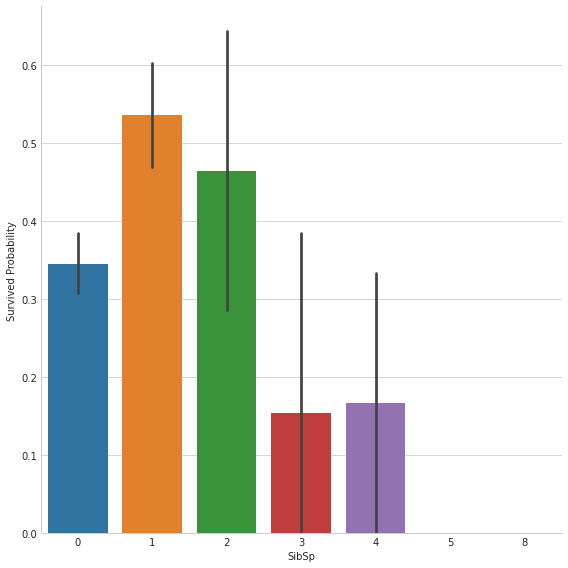

In [27]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = df_train, kind = "bar", size = 8)
g.set_ylabels("Survived Probability")
plt.show()

# Having a lot of SibSp that have less chance to survive

<a id="14"></a><br>
# Parch -- Survived

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


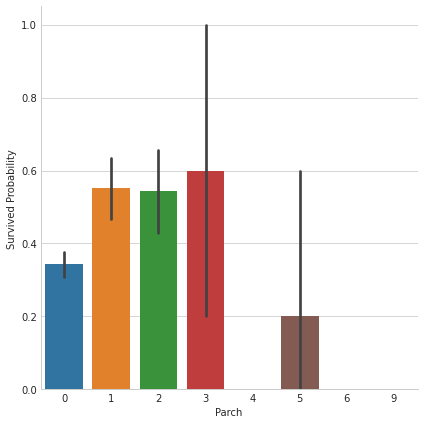

In [28]:
g = sns.factorplot(x= "Parch",y = "Survived", kind= "bar", data= df_train, size= 6)
g.set_ylabels("Survived Probability")
plt.show()

# Small families have more chance to survive

<a id="15"></a><br>
# Pclass -- Survived

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


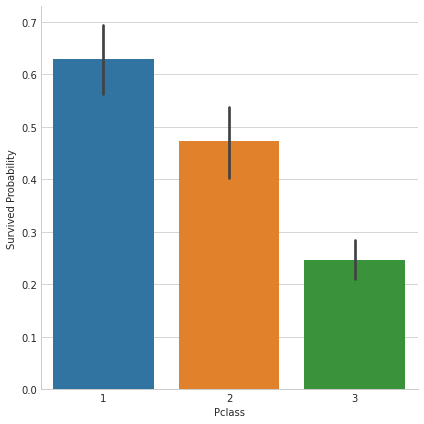

In [29]:
g = sns.factorplot(x = "Pclass", y= "Survived", data= df_train, kind= "bar", size= 6)
g.set_ylabels("Survived Probability")
plt.show()

<a id="16"></a></br>
# Age -- Survived

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


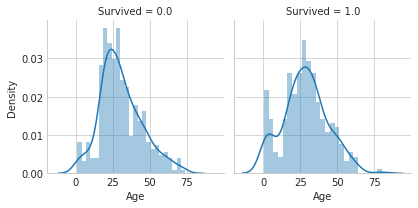

In [30]:
g= sns.FacetGrid(df_train, col= "Survived")
g.map(sns.distplot,"Age",bins= 25)
plt.show()

#oldest passengers (75) survived, large number of 20 years old did not survive, children have a high survival rate, most passengers are in 15-35 age range

<a id="17"></a></br>
# Pclass -- Survived -- Age

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


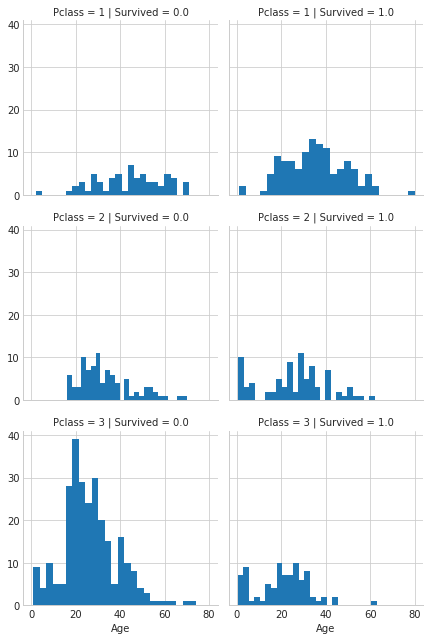

In [31]:
g= sns.FacetGrid(df_train, col= "Survived", row= "Pclass", size= 3)
g.map(plt.hist,"Age",bins=25)
g.add_legend()
plt.show()

# pclass is important feature for model traning

<a id="18"></a></br>
# Embarked -- Sex -- Pclass -- Survived

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


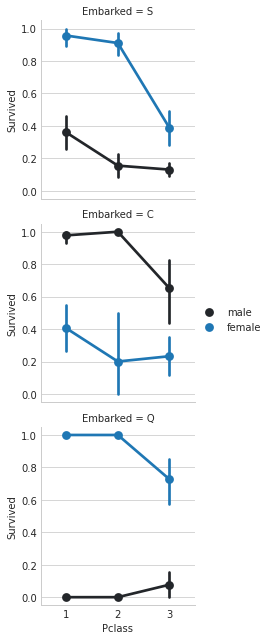

In [32]:
g= sns.FacetGrid(df_train, row= "Embarked", size= 3)
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

# Female passengers have much better survival rate than males
# Males have better survival rate in pclass = 3 in C
# Embarked and sex will be used in training

<a id="19"></a></br>
# Embarked -- Sex -- Fare -- Survived

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


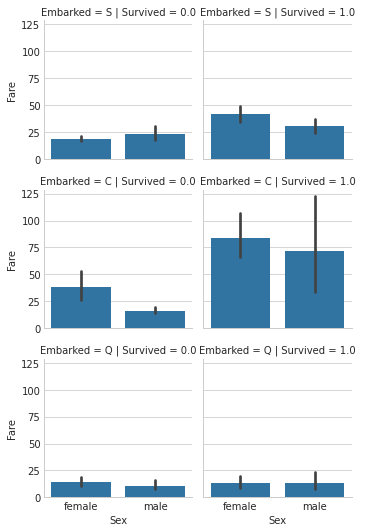

In [33]:
g= sns.FacetGrid(df_train, row= "Embarked", col= "Survived", size= 2.5)
g.map(sns.barplot,"Sex", "Fare")
g.add_legend()
plt.show()

# Passengers who pay higher fare have better survival
# Fare can be used as categorical for training.

<a id="20"></a></br>
# Fill Missing: Age Feature

In [34]:
df_train[df_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


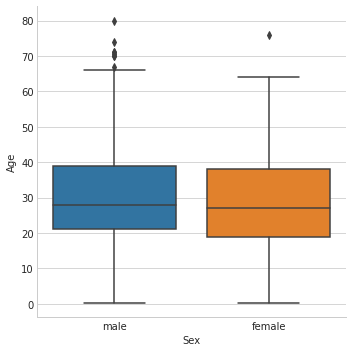

In [35]:
sns.factorplot(x= "Sex", y = "Age", data= df_train, kind= "box")

# Sex is not informative for age prediction because of age distribution seems to be same 

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


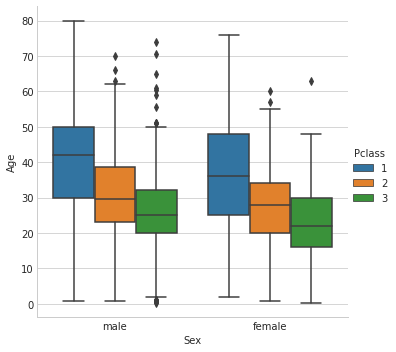

In [36]:
sns.factorplot(x="Sex",y="Age", hue = "Pclass",data= df_train, kind="box")
plt.show()

# 1st class passengers are older than 2nd, and 2nd is older than 3rd class.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


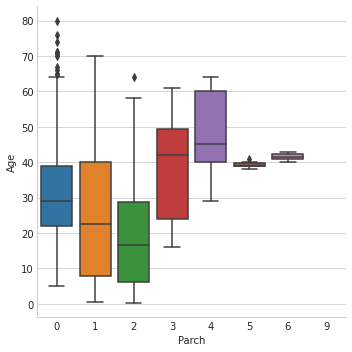

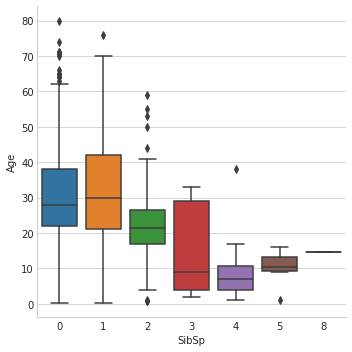

In [37]:
sns.factorplot(x = "Parch", y="Age",  data = df_train, kind="box")
sns.factorplot(x = "SibSp", y="Age",  data = df_train, kind="box")


In [38]:
df_train["Sex"] = [1 if i == "male" else 0 for i in df_train["Sex"]]

<AxesSubplot:>

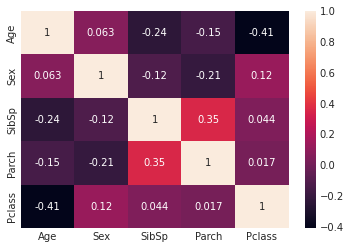

In [39]:
sns.heatmap(df_train[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot = True)

Age is not correlated with sex but it is correlated with parch, sibsp and pclass

In [40]:
index_nan_age = list(df_train["Age"][df_train["Age"].isnull()].index)
for i in index_nan_age:
    age_pred= df_train["Age"][((df_train["SibSp"]==df_train.iloc[i]["SibSp"]) & (df_train["Parch"]==df_train.iloc[i]["Parch"]) & (df_train["Pclass"]==df_train.iloc[i]["Pclass"])) ].median()
    age_med= df_train["Age"].median()
    if not np.isnan(age_pred):
        df_train["Age"].iloc[i] = age_pred
    else:
        df_train["Age"].iloc[i] = age_med

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
df_train[df_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="21"></a></br>
# Feature Engineering

<a id="22"></a></br>
## Name -- Title

In [42]:
df_train["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [43]:
name = df_train["Name"]
df_train["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [44]:
df_train["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

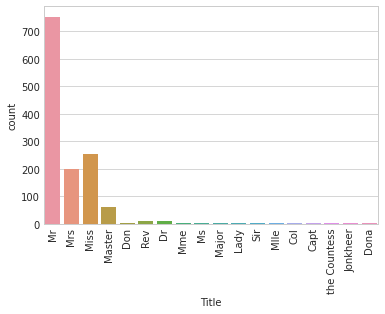

In [45]:
sns.countplot(x = "Title", data = df_train)
plt.xticks(rotation = 90)
plt.show()

In [46]:
#Title is converted to zero or one 

df_train["Title"]=df_train["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
df_train["Title"]= [0 if i == "Master" else 1 if i ==" Miss" or i == "Ms" or i =="Mlle" or i =="Mrs" else 2 if i == "Mr" else 3 for i in df_train["Title"]]

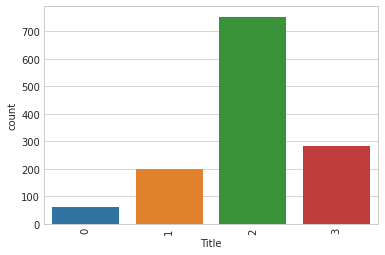

In [47]:
sns.countplot(x = "Title" , data = df_train)
plt.xticks(rotation = 90)
plt.show()

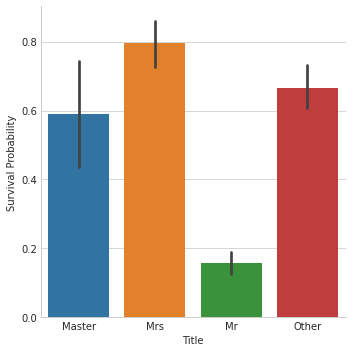

In [48]:
g = sns.catplot(x = "Title" , y = "Survived", data= df_train , kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [49]:
df_train.drop(labels = ["Name"], axis = 1, inplace = True)


In [50]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,2
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,2
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,1


In [51]:
df_train = pd.get_dummies(df_train,columns=["Title"])
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0


<a id="23"></a></br>
## Family Size

In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [53]:
df_train["Fsize"] = df_train["SibSp"] + df_train["Parch"] + 1

In [54]:
df_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


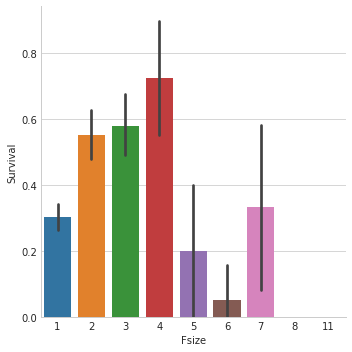

In [55]:
g = sns.factorplot(x = "Fsize",y = "Survived", data = df_train, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [56]:
df_train["family_size"] = [1 if i < 5 else 0 for i in df_train["Fsize"]]

In [57]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


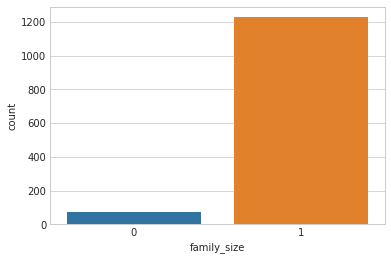

In [58]:
sns.countplot(x = "family_size", data = df_train)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


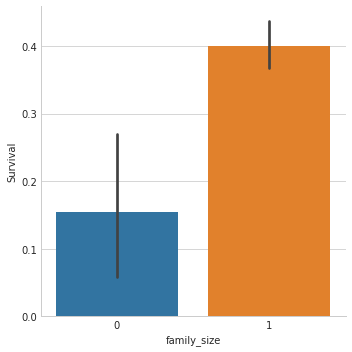

In [59]:
g = sns.factorplot(x = "family_size", y = "Survived", data = df_train, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small families have more chance to survive than large families

In [60]:
df_train = pd.get_dummies(df_train, columns = ["family_size"])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id="24"></a></br>
## Embarked

In [61]:
df_train["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

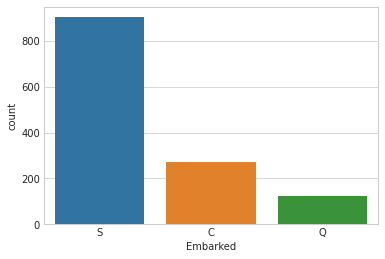

In [62]:
sns.countplot(x = "Embarked" , data = df_train)
plt.show()

In [63]:
df_train = pd.get_dummies(df_train, columns = ["Embarked"])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id="25"></a></br>
## Ticket

In [64]:
df_train["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [65]:
tickets = []
for i in list(df_train["Ticket"]):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
        
df_train["Ticket"] = tickets


In [66]:
df_train["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [67]:
df_train = pd.get_dummies(df_train, columns = ["Ticket"], prefix = "T")

<a id="26"></a></br>
# Pclass

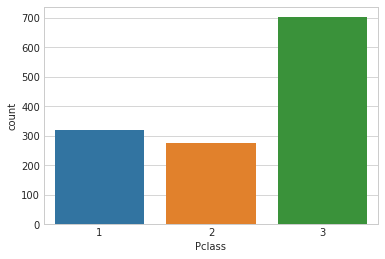

In [68]:
sns.countplot(x = "Pclass", data = df_train)
plt.show()

In [69]:
df_train["Pclass"] = df_train["Pclass"].astype("category")
df_train = pd.get_dummies(df_train,columns=["Pclass"])
df_train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id="27"></a></br>
# Sex

In [70]:
df_train["Sex"] = df_train["Sex"].astype("category")
df_train = pd.get_dummies(df_train, columns=["Sex"])
df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id="28"></a></br>
# Drop Passenger ID and Cabin

In [71]:
df_train.drop(labels = ["PassengerId" , "Cabin"], axis=1, inplace = True)

<a id="29"></a></br>
# Modeling

In [72]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id="30"></a></br>
## Train - Test Split 

In [73]:
df_train_len

881

In [74]:
test = df_train[df_train_len:]
test.drop(labels = ["Survived"],axis=1,inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [76]:
train = df_train[:df_train_len]
X_train = train.drop(labels = "Survived",axis=1)
y_train = train["Survived"]
X_train, X_test,y_train,y_test = train_test_split(X_train, y_train, test_size = 0.33 , random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


<a id="31"></a></br>
## Simple Logistic Regression

In [77]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(X_train,y_train)
acc_log_train = round(logreg.score(X_train,y_train)*100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Traning Acc : % {}".format(acc_log_train))
print("Testing Acc : % {}".format(acc_log_test))

Traning Acc : % 83.05
Testing Acc : % 81.79


<a id="32"></a></br>
## Hyperparameter Tuning - Grid Search - Cross Validation

We will compare 5 ML classifier and evaluate mean accuracy of each of them by stratifed cross validation

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression


In [78]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state=random_state),
             SVC(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(solver="liblinear",random_state=random_state),
             KNeighborsClassifier()]
df_param_grid = {"min_samples_split":range(10,500,20),
                "max_depth":range(1,20,2)}
svc_param_grid = {"kernel":["rbf"],
                 "gamma":[0.001,0.01,0.1,1],
                 "C":[1,10,50,100,200,300,1000]}
rf_param_grid = {"max_features":[1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty":["l1","l2"]}
knn_param_grid = {"n_neighbors":np.linspace(1,19,10,dtype=int).tolist(),
                 "weights":["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [df_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [79]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid = classifier_param[i], cv = StratifiedKFold(n_splits=10),scoring="accuracy", n_jobs =-1,verbose= 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7966101694915254
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8254237288135592
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s


0.7745762711864406


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.7s finished


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cross Validation Scores')

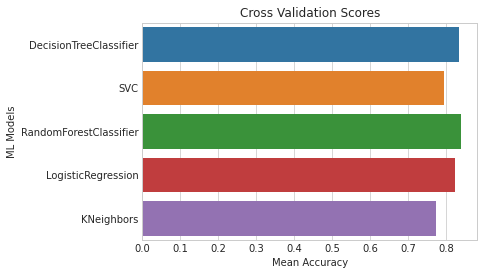

In [80]:
results=pd.DataFrame({"Cross Validation Means":cv_result,"ML Models":["DecisionTreeClassifier","SVC","RandomForestClassifier","LogisticRegression","KNeighbors"]})
g = sns.barplot("Cross Validation Means","ML Models" ,data = results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id="33"></a></br>
## Ensemble Modeling

In [81]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs= -1)
votingC= votingC.fit(X_train,y_train)

print("Accuracy : ",accuracy_score(votingC.predict(X_test),y_test))

Accuracy :  0.8178694158075601


<a id="34"></a></br>
## Prediction and Submission

In [82]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([df_passengerid,test_survived],axis=1)
results.to_csv("titanic.csv",index = False)

In [83]:
test_survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64